# Proyek Analisis Data: Nama dataset
- Nama: Salsabila Zahirah / Ira Salsabila
- Email: irasalsabila@gmail.com
- Id Dicoding: [irasalsabila](https://www.dicoding.com/users/irasalsabila/)

## Menentukan Pertanyaan Bisnis

**Specifict:**
- Berapa jumlah total sewa sepeda (cnt) untuk tahun 2011 dan 2012 selama musim semi (musim 1)?

**Measurable:**
- Berapa banyak sepeda sewaan yang digunakan pada hari libur (liburan = 1) selama musim panas (musim 2) pada tahun 2011 dan 2012?

**Action-oriented:**
- Bagaimana cara meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa (casual) pada hari kerja (hari kerja = 1)?

**Relevant:**
- Apa hubungan suhu (temp) dengan jumlah pengguna biasa (casual)?
- Apa pengaruh cuaca (weathersit) terhadap jumlah sewa sepeda (cnt) selama musim gugur (season 3)?

**Time-bound:**
- Berapa distribusi per jam sewa sepeda (cnt) pada Hari Natal (hari libur = 1) pada tahun 2012 (tahun = 1)?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

d:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("dataset/day.csv")
display("this is df_day: ", df_day)

df_hour = pd.read_csv("dataset/hour.csv")
display("this is df_hour: ", df_hour)

'this is df_day: '

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


'this is df_hour: '

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [3]:
# Printing datatype information of the df_day DataFrame
print('Dataframe day - Datatype Information:')
print(df_day.info())

# Checking for duplicated entries in df_day
print('Dataframe day - Duplicated Entries:', df_day.duplicated().sum())

# Displaying descriptive statistics of df_day
display(df_day.describe())

Dataframe day - Datatype Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
Dataframe day - Duplicated Entries: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [4]:
# Printing datatype information of the df_hour DataFrame
print('Dataframe day - Datatype Information:')
print(df_hour.info())

# Checking for duplicated entries in df_hour
print('Dataframe day - Duplicated Entries:', df_hour.duplicated().sum())

# Displaying descriptive statistics of df_hour
display(df_hour.describe())


Dataframe day - Datatype Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
Datafr

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [5]:
## Converting "dteday" column to datetime ##
# df_day
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
# df_hour
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

# Checking the data type after conversion for df_day and df_hour
print('Data type of df_day["dteday"]: ', df_day["dteday"].dtypes)
print('Data type of df_hour["dteday"]: ', df_hour["dteday"].dtypes)

Data type of df_day["dteday"]:  datetime64[ns]
Data type of df_hour["dteday"]:  datetime64[ns]


## Exploratory Data Analysis (EDA)

> Correlation of all variables

C:\Users\247\AppData\Local\Temp\ipykernel_27992\3342907280.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_day.corr()


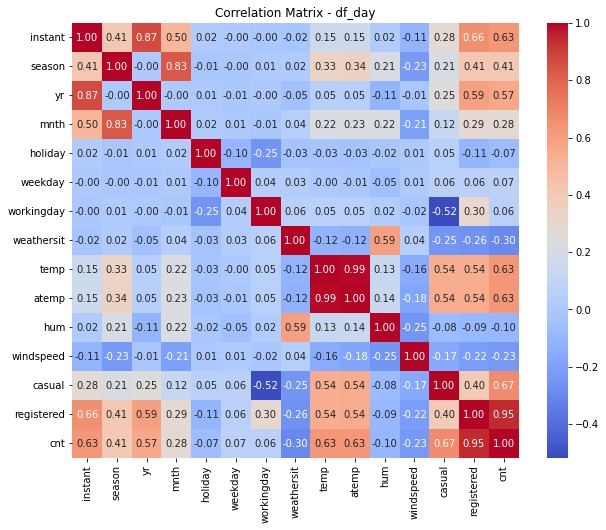

In [6]:
# Generating the correlation matrix for df_day
correlation_matrix = df_day.corr()

# Visualizing the correlation matrix as a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - df_day')
plt.show()

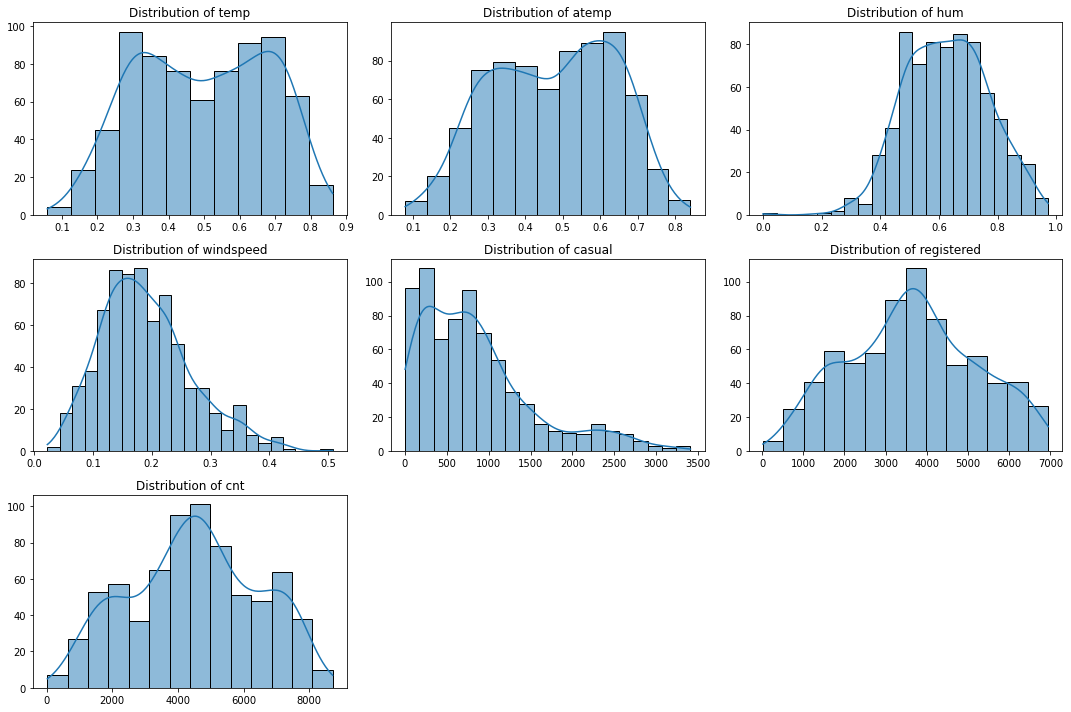

In [7]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Define the number of columns and rows in the grid
num_cols = 3  # Number of columns for the grid
num_rows = (len(numeric_cols) - 1) // num_cols + 1  # Number of rows based on columns

# Create subplots for the histograms in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array to easily iterate through all subplots
axes = axes.flatten()

# Plot each numeric column as a histogram
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(df_day[col], ax=ax, kde=True, bins='auto')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide extra subplots if there are any
for i in range(len(numeric_cols), num_cols * num_rows):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


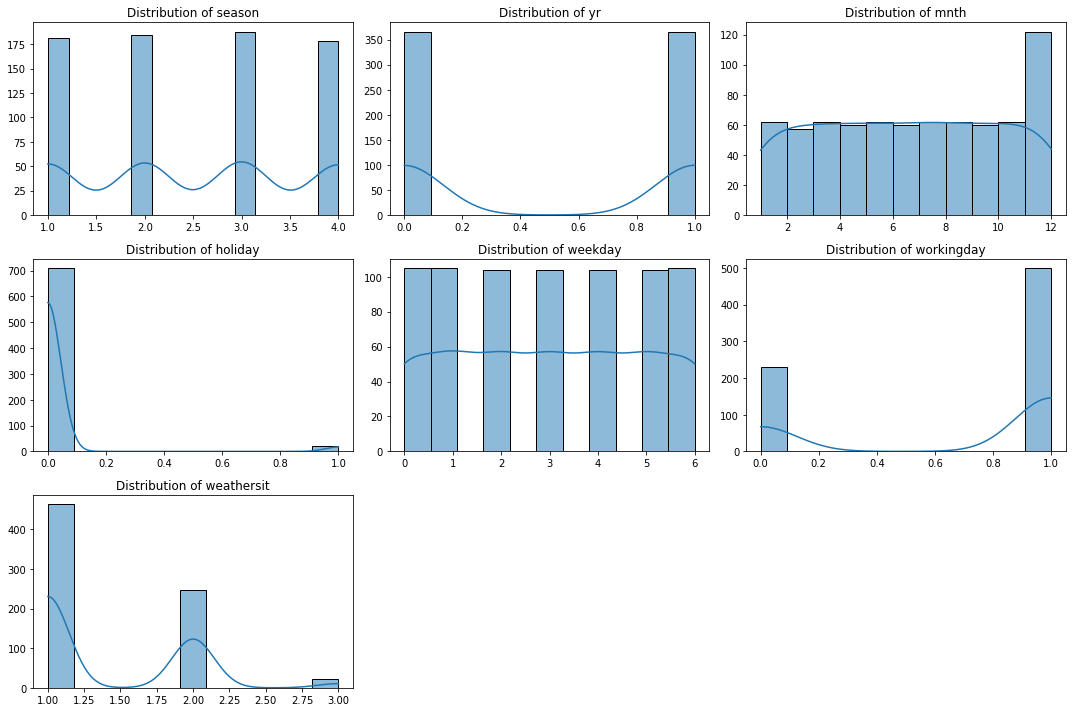

In [8]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Define the number of columns and rows in the grid
num_cols = 3  # Number of columns for the grid
num_rows = (len(categorical_cols) - 1) // num_cols + 1  # Number of rows based on columns

# Create subplots for the histograms in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array to easily iterate through all subplots
axes = axes.flatten()

# Plot each numeric column as a histogram
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.histplot(df_day[col], ax=ax, kde=True, bins='auto')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide extra subplots if there are any
for i in range(len(categorical_cols), num_cols * num_rows):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

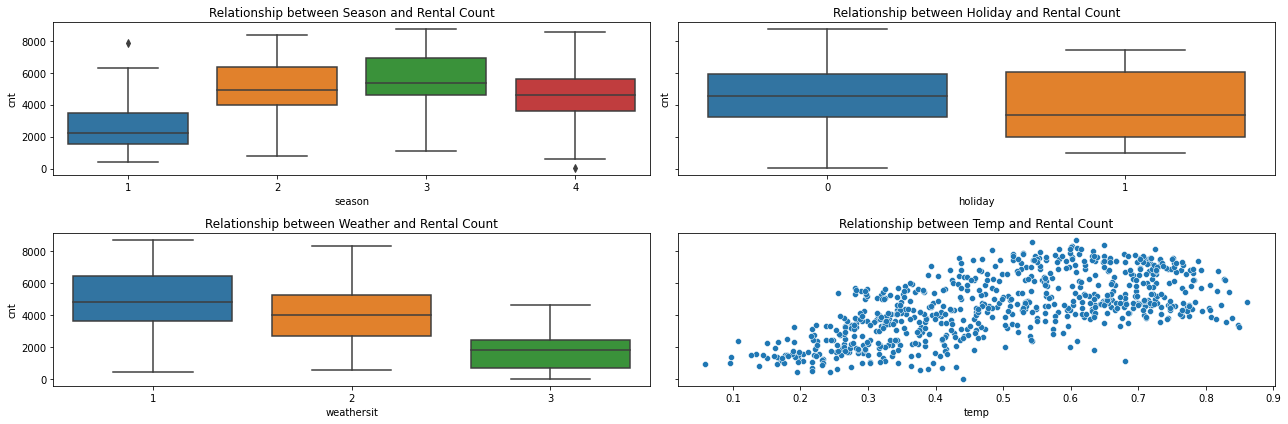

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 6), sharey=True)

# Visualizing the relationship between seasons and rental count using a box plot
sns.boxplot(x='season', y='cnt', data=df_day, ax=axes[0, 0])
axes[0, 0].set_title('Relationship between Season and Rental Count')

# Visualizing the relationship between holidays and rental count using a box plot
sns.boxplot(x='holiday', y='cnt', data=df_day, ax=axes[0, 1])
axes[0, 1].set_title('Relationship between Holiday and Rental Count')

# Visualizing the relationship between weather and rental count using a box plot
sns.boxplot(x='weathersit', y='cnt', data=df_day, ax=axes[1, 0])
axes[1, 0].set_title('Relationship between Weather and Rental Count')

# Visualizing the relationship between temp and rental count using a scatter plot
sns.scatterplot(x='temp', y='cnt', data=df_day, ax=axes[1, 1])
axes[1, 1].set_title('Relationship between Temp and Rental Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

> Berapa jumlah total sewa sepeda (cnt) untuk tahun 2011 dan 2012 selama musim semi (musim 1)?

In [10]:
# Filter the data for year 2011 and 2012 during spring season
spring_data_2011 = df_day[(df_day["yr"] == 0) & (df_day["season"] == 1)]
spring_data_2012 = df_day[(df_day["yr"] == 1) & (df_day["season"] == 1)]

# Calculate total bike rentals for the spring season in 2011 and 2012
total_rentals_2011 = spring_data_2011["cnt"].sum()
total_rentals_2012 = spring_data_2012["cnt"].sum()

# Calculate combined total for both years
total_rentals_combined = total_rentals_2011 + total_rentals_2012

print("Total bike rentals during spring season for 2011:", total_rentals_2011)
print("Total bike rentals during spring season for 2012:", total_rentals_2012)
print("Combined total bike rentals during spring season for 2011 and 2012:", total_rentals_combined)


percentage_increase = ((total_rentals_2012 - total_rentals_2011) / total_rentals_2011) * 100
print(f"Percentage increase in bike rentals from 2011 to 2012 during the spring season: {percentage_increase:.2f}%")

Total bike rentals during spring season for 2011: 150000
Total bike rentals during spring season for 2012: 321348
Combined total bike rentals during spring season for 2011 and 2012: 471348
Percentage increase in bike rentals from 2011 to 2012 during the spring season: 114.23%


**Insight:**
Jumlah total penyewa sepeda pada tahun 2011 dan 2012 mengalami kenaikan sebesar 114.23%, dari 150,000 penyewa ke 321,348 penyewa selama musim semi.

> Berapa banyak sepeda sewaan yang digunakan pada hari libur (liburan = 1) selama musim panas (musim 2) pada tahun 2011 dan 2012?


In [11]:
# Filter the data for holidays during the summer season in 2011 and 2012
summer_holiday_data_2011 = df_day[(df_day["yr"] == 0) & (df_day["season"] == 2) & (df_day["holiday"] == 1)]
summer_holiday_data_2012 = df_day[(df_day["yr"] == 1) & (df_day["season"] == 2) & (df_day["holiday"] == 1)]

# Calculate the total bike rentals during holidays in summer for 2011 and 2012
total_rentals_summer_2011 = summer_holiday_data_2011["cnt"].sum()
total_rentals_summer_2012 = summer_holiday_data_2012["cnt"].sum()

# Calculate combined total for both years
total_rentals_summer_combined = total_rentals_summer_2011 + total_rentals_summer_2012

print("Total bike rentals during holidays in summer for 2011:", total_rentals_summer_2011)
print("Total bike rentals during holidays in summer for 2012:", total_rentals_summer_2012)
print("Combined total bike rentals during holidays in summer for 2011 and 2012:", total_rentals_summer_combined)

percentage_increase = ((total_rentals_summer_2012 - total_rentals_summer_2011) / total_rentals_summer_2011) * 100
print(f"Percentage increase in bike rentals from 2011 to 2012 during summer holiday: {percentage_increase:.2f}%")

Total bike rentals during holidays in summer for 2011: 7224
Total bike rentals during holidays in summer for 2012: 12413
Combined total bike rentals during holidays in summer for 2011 and 2012: 19637
Percentage increase in bike rentals from 2011 to 2012 during summer holiday: 71.83%


**Insight:** Jumlah total penyewa pada tahun 2011 dan 2012 mengalami kenaikan sebesar 71.83%, dari 7,224 penyewa ke 12,413 penyewa selama liburan musim panas.

> Bagaimana cara meningkatkan jumlah rental sepeda yang digunakan oleh pengguna biasa (casual) pada hari kerja (hari kerja = 1)?


In [12]:
# Filter data for working days and casual rentals
working_day_casual_data = df_day[(df_day["workingday"] == 1) & (df_day["casual"] > 0)]

fig = px.bar(working_day_casual_data, x="weekday", y="casual", title="Number of Casual Bike Rentals on Working Days")
fig.update_xaxes(title="Weekday")
fig.update_yaxes(title="Number of Casual Bike Rentals")
fig.show()

**Strategi:**
- Melakukan promosi dan penawaran khusus pada hari-hari tertentu yang memiliki grafik rendah
- Memastikan fasilitas dapat dengan mudah diakses
- Mempertimbangkan untuk menambahkan unit pada hari dengan penggunaan tinggi


> Apa hubungan suhu (temp) dengan jumlah pengguna biasa (casual)?


In [13]:
# Create a scatter plot to analyze the relationship between temperature and casual users
fig = px.scatter(df_day, x="temp", y="casual", title="Temperature vs. Number of Casual Users")
fig.update_xaxes(title="Temperature (in Celsius)")
fig.update_yaxes(title="Number of Casual Users")
fig.show()

**Insight:**
Peda grafik *scatterplot* menunjukkan korelasi yang positif pada peningkatan suhu yang dibarengi dengan meningkatnya jumlah pengguna atau penyewa sepeda.

> Apa pengaruh cuaca (weathersit) terhadap jumlah sewa sepeda (cnt) selama musim gugur (season 3)?


In [14]:
# Filter for the fall season (season 3)
filtered_data = df_day[df_day["season"] == 3]

# Create a Plotly bar plot to analyze the impact of weather on bike rentals
fig = px.bar(filtered_data, x="weathersit", y="cnt", title="Impact of Weather on Bike Rentals (Fall Season)")
fig.update_xaxes(title="Weather Situation (weathersit)")
fig.update_yaxes(title="Bike Rentals Count (cnt)")

# Display the plot
fig.show()

**Insight:**
*Weather situation* memiliki dampak terhadap penyewaan. Dapat dilihat bahwa cuaca yang berawan lebih disukai pada penyewa dibandingkan cuaca yang lain.

**Info:**
1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

> Berapa distribusi per jam sewa sepeda (cnt) pada Hari Natal (hari libur = 1) pada tahun 2012 (tahun = 1)?

In [15]:
# Filter data for the year 2012 (yr = 1), Christmas Day (holiday = 1) on December 25th, 2012
filtered_data = df_hour[(df_hour["yr"] == 1) & 
                        (df_hour["holiday"] == 1) & 
                        (df_hour["dteday"] == "2012-12-25")]

# Calculate the hourly distribution of bike rentals (cnt)
hourly_distribution = filtered_data.groupby("hr")["cnt"].sum()

print("Hourly distribution of bike rentals on Christmas Day in 2012:")
print(hourly_distribution)

Hourly distribution of bike rentals on Christmas Day in 2012:
hr
0      13
1      13
2       7
4       1
5       3
6       7
7       6
8      11
9      28
10     32
11     86
12    114
13    121
14    126
15    107
16     86
17     50
18     43
19     36
20     40
21     34
22     19
23     30
Name: cnt, dtype: int64


**Insight:**
Distribusi penyewaan sepeda pada Christmas Day, tepat pada 25 Desember 2012, terlihat terjadi lonjakan dimulai sejak jam 10 AM hingga 4 PM. Hal ini menggambarkan situasi keramaian natal bagi yang merayakan.

## Conclusion

- Terjadinya persentasi kenaikan penyewaan hampir lebih dari 100% dari 2011 ke 2012 selama musim semi.
- Selama liburan musim panas, sewa sepeda mengalami kenaikan persentasi penyewa hampir 100%. Jumlah sepeda sewaan juga mengindikasikan bahwa bersepeda merupakan salah satu kegiatan yang populer dilakukan saat liburan.
- Peningkatan penyewaan terjadi pada hari terakhir dalam minggu, Jumat. Memperlihatkan penggunaan yang signifikan pada hari tersebut dibanding hari biasanya.
- Berdasarkan grafik, peningkatan suhu dengan penyewaan sepeda menunjukkan bahwa peminat pengguna sepeda berada di temperatur ataupun cuaca yang cenderung cerah atau berawan dibandingkan temperatur yang dingin.
- Pada Hari Natal, distribusi sepeda menunjukkan spike pada rentang jam 10 pagi hingga jam 4 sore, dengan penggunaan tertinggi pada jam 2 siang.